# Базовое решение Задачи 1 "Изучение критической температуры сверхпроводников"

Данные о сверхпроводниках взяты из базы данных сверхпроводящих материалов, собранной Национальным институтом материаловедения Японии NIMS. 

Данные содержат сведения о **21 263 сверхпроводников**.

*   Тренировочный набор - **17010** строк.
*   Тестовый набор - **4253** строк.

Для каждого сверхпроводника в данных приведены полная химическая формула сверхпроводника, а также 8 основных химических свойств (абсолютное значение, среднее, взвешенное среднее и так далее): атомная масса, энергия ионизации, радиус атома, плотность, удельная теплота плавления, энергия сродства к электрону, теплопроводность, валентность.


## Считывание данных

In [1]:
from google.colab import files
uploaded = files.upload()

Saving formula_test.csv to formula_test.csv
Saving formula_train.csv to formula_train.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [30]:
# иморитирование всех необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Считываем тренировочные данные
train = pd.read_csv("train.csv")
formula_train = pd.read_csv("formula_train.csv")

print(f"Train dataset shape: {train.shape}")
print(f"Train_formula dataset shape: {formula_train.shape}")

Train dataset shape: (17010, 82)
Train_formula dataset shape: (17010, 88)


In [32]:
# Считываем тестовые данные
test = pd.read_csv("test.csv")
formula_test = pd.read_csv("formula_test.csv")

print(f"Test dataset shape: {test.shape}")
print(f"Test_formula dataset shape: {formula_test.shape}")

Test dataset shape: (4253, 81)
Test_formula dataset shape: (4253, 87)


In [33]:
# Посмотрим как выглядят данные
train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [34]:
formula_train.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


## Исследование данных

Прежде чем переходить к непосредственному построению модели, в первую очередь необходимо исследовать имеющихся у вас набор данных:
1. Какую задачу вы решаете (классификация, регрессия) и какая переменная является целевой?
2. Сколько переменных в данных и какого они типа?
3. Имеются ли в данных пропуски?

In [35]:
print("Number of missing values in train datasets:")
print(train.isna().sum())
print(formula_train.isna().sum())

Number of missing values in train datasets:
number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64
H                0
He               0
Li               0
Be               0
B                0
                ..
Po               0
At               0
Rn               0
critical_temp    0
material         0
Length: 88, dtype: int64


In [36]:
print("Number of missing values in test datasets:")
print(test.isna().sum())
print(formula_test.isna().sum())

Number of missing values in test datasets:
number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
wtd_entropy_Valence      0
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
Length: 81, dtype: int64
H           0
He          0
Li          0
Be          0
B           0
           ..
Bi          0
Po          0
At          0
Rn          0
material    0
Length: 87, dtype: int64


In [37]:
# Полные сведения о каждой переменной в тренировочном наборе данных
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17010 entries, 0 to 17009
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               17010 non-null  int64  
 1   mean_atomic_mass                 17010 non-null  float64
 2   wtd_mean_atomic_mass             17010 non-null  float64
 3   gmean_atomic_mass                17010 non-null  float64
 4   wtd_gmean_atomic_mass            17010 non-null  float64
 5   entropy_atomic_mass              17010 non-null  float64
 6   wtd_entropy_atomic_mass          17010 non-null  float64
 7   range_atomic_mass                17010 non-null  float64
 8   wtd_range_atomic_mass            17010 non-null  float64
 9   std_atomic_mass                  17010 non-null  float64
 10  wtd_std_atomic_mass              17010 non-null  float64
 11  mean_fie                         17010 non-null  float64
 12  wtd_mean_fie      

## Предобработка данных

### **Тренировочные данные.**

В данной задаче у нас имеются два датасета для тренировки и для теста, для удобства сформируем один DataFrame.

Так как колонка с целевой переменной имеется в обоих датасетах, удалим её из одного, чтобы не дублировать.

In [38]:
formula_train = formula_train.drop(columns=['critical_temp'])

train_full = pd.concat([train, formula_train], axis=1)

print(f"Full Train dataset shape: {train_full.shape}")

Full Train dataset shape: (17010, 169)


In [39]:
# Удалим из данных ненужную колонку 'material'
train_full.drop(columns=['material'], inplace=True)

In [40]:
train_full.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [12]:
# Выделим из набора данных вектор признаков и вектор ответов
X = train_full.drop(columns=['critical_temp'])
y = train_full['critical_temp']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (17010, 167)
Target shape: (17010,)


### **Тестовые данные.**

Обработаем аналогичным образом тестовые данные.

In [41]:
test_full = pd.concat([test, formula_test], axis=1)

print(f"Full Test dataset shape: {test_full.shape}")

Full Test dataset shape: (4253, 168)


In [42]:
# Удалим из данных ненужную колонку 'material'
test_full.drop(columns=['material'], inplace=True)

In [44]:
test_full.shape

(4253, 167)

## Обучение модели

## Разделение данных на подвыборки

Одна из целей построения алгоритмов машинного обучения, постоить такую модель, которая будет способная также хорошо работать с новыми данными, которых она не видела до этого, как и с теми данными на которых обучалась.

Это называется **обобщающей способностью** моделей.

**Обобщающая способность** — это способность аналитической модели, построенной на основе машинного обучения (нейронной сети, дерева решений, карты Кохонена и др.) выдавать правильные результаты не только для примеров, участвовавших в процессе обучения, но и для любых новых, которые не участвовали в нем.

Именно поэтому при обучении модели, существующий набор данных разделяют на подвыборки:
- **тренировочную (train)** - набор данных на которых мы обучаем нашу модель
- **тестовую (test)** - это набор данных, которые мы не использовали для обучения нашей модели, т. е. это данные которые не видела наша модель. Набор данных используется для тестирования и оценки модели.

***Таким образом разделение данных на обучающую и тестовую выборки позволяет имитировать работу модели на новых/неизвестных данных.***


К тому же при использовании одних и тех же данных может возникнуть **Переобучение** — это термин, используемый для описания того, когда модель изучила эту взаимосвязь «слишком хорошо» для обучающих данных.

Под «слишком хорошо» мы подразумеваем скорее то, что он слишком близко изучил взаимосвязь — что он видит больше тенденций/корреляций/связей, чем существует на самом деле.

**Существует две основных стратегий разделения данных на подвыборки:**
1. отложенная выборка: разделение данных на две части (train и test)
2. Кроссвалидация

### Отложенная выбора

Данный подход эффективен при большом количестве данных, при маленьких размерах выборки может возникнуть множество различных проблем.

В библиотеки sklearn реализован метод позволяющий осуществить данное разбиение:

`from sklearn.model_selection import train_test_split`

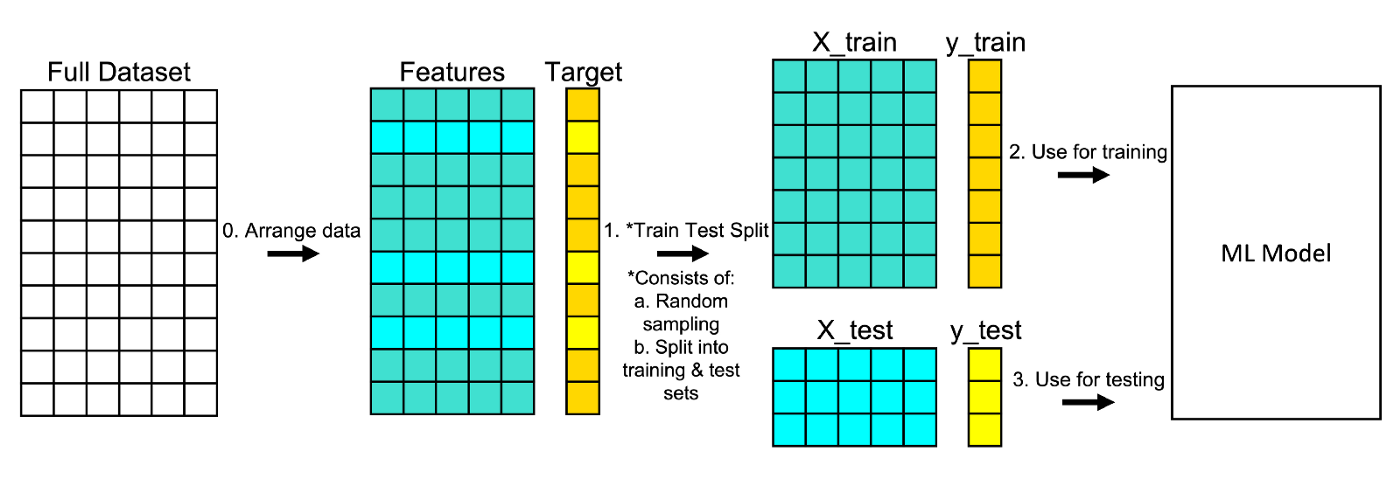

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (11907, 167), (11907,)
Train dataset size: (5103, 167), (5103,)


### Кроссвалидация

Это метод, используемый для обучения и оценки модели машинного обучения с использованием нескольких частей набора данных. Это означает, что вместо того, чтобы разбивать набор данных только на две части, одну для обучения и другую для тестирования, набор данных делится на большее количество подвыборок.

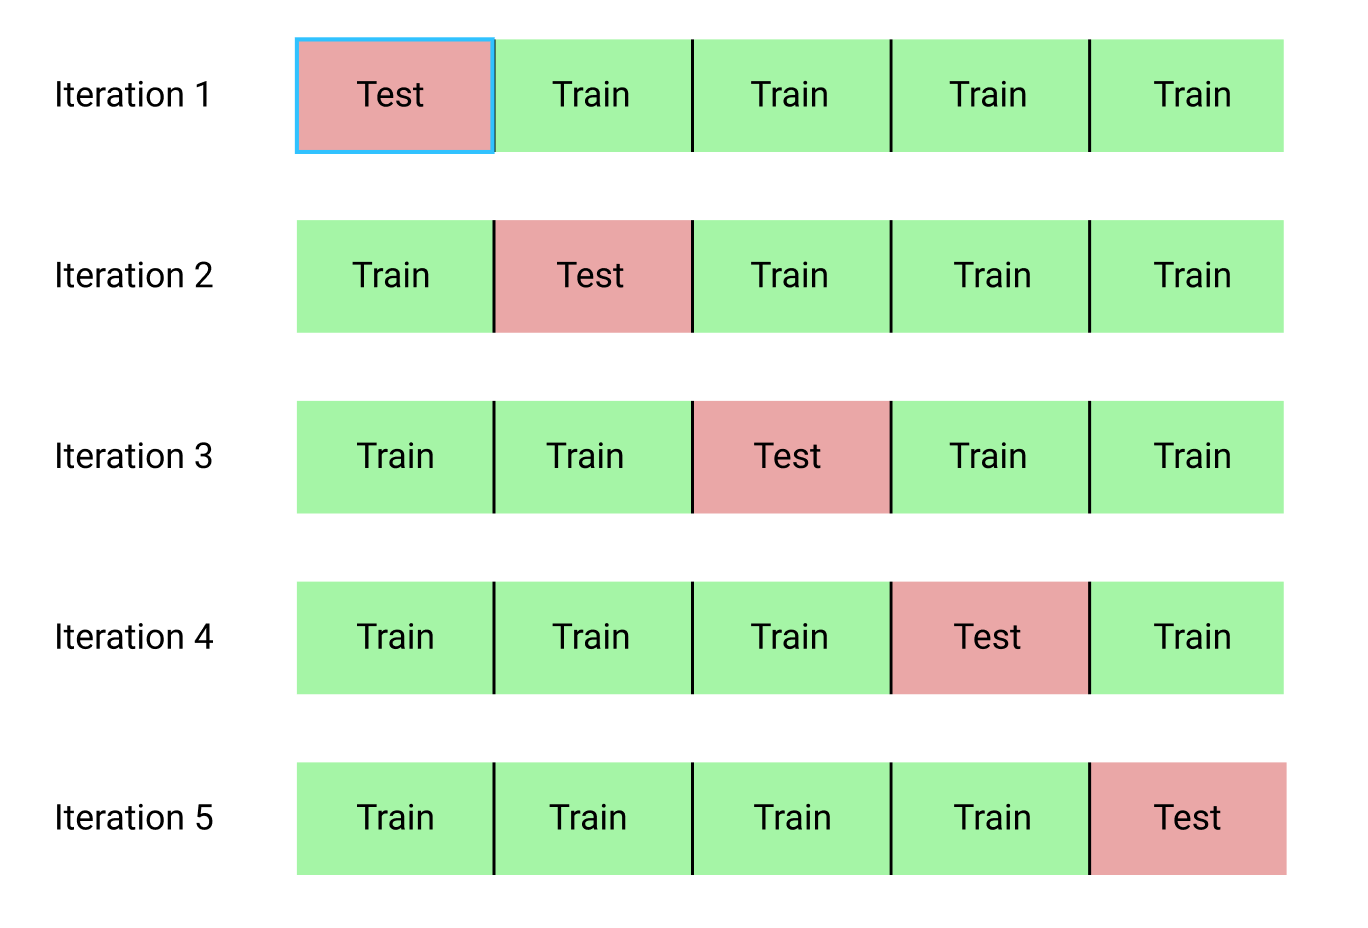

Выборка разбивается на k непересекающихся подмножеств, и каждое из них по очереди выступает в качестве контрольной выборки (а остальные k − 1 частей — в качестве обучающей выборки). В качестве результата выдается средняя ошибка по всем контрольным выборкам.

Значение k должно быть тщательно выбрано для выборки данных.

Плохо выбранное значение для k может привести к неправильному представлению о качестве модели, например, к оценке с высокой дисперсией (которая может сильно измениться на основе данных, используемых в соответствии с моделью), или к высокой предвзятости (например, переоценка качества модели).

k выбирают обычно 5 или 10, но нет формального правила. По мере того как k становится больше, разница в размере между тестовой выборкой и подмножествами resampling становится мала. По мере уменьшения этой разницы предвзятость к технике становится меньше.


В библиотеки sklearn также реализован метод кросс валидации:

```
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
```

Конструктор выглядит следующим образом:

`sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)`

где:
- estimator - модель машинного обучения
- X - вектор признаков
- y - вектор целевой переменной
- scoring - оценка модели
- cv - количество фолдов (подвыборок)

### Обучение

В данном примере мы решаем задачу регрессии и для её решения воспользуемся алгоритмом ***Линейной регрессии***.

In [16]:
# импортируем необходмимые библиотеки
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

В нашем наборе данных **167** различных признаков, значит уравнение линейной регрессии будет выглядеть следующим образом в общем виде:

$y = w_0 + w_1*x_1 + w_2*x_2 + ... + w_{167}*x_{167}$

И задача линейной регрессии сводится к рассчёту коэффицентов (весов $w_i$) при признаках $x_i$.

In [46]:
# Создадим модель линейной регрессии
model = LinearRegression()

# Обучим линейную регрессию на тренировочном стандартизированном наборе данных 
# На этапе обучения алгоритм рассчитывает веса признаков и строит линейное уравнение регрессии 
model.fit(X_train, y_train)

LinearRegression()

In [18]:
print('Веса всех признаков (w1, ..., w167): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

Веса всех признаков (w1, ..., w167):  [ 1.42925884e+00  1.01211024e+00 -1.44165516e+00 -5.00162723e-01
  8.72804205e-01 -1.83006955e+01 -5.17535652e+00  2.14274128e-01
  1.06664118e-01 -5.77286188e-01  7.51961191e-02 -2.21156661e-01
  1.20809637e-01  1.96979591e-01 -6.92678945e-02  1.19859086e+01
  5.28796404e+01  3.35916006e-02  2.08048718e-02 -5.66005786e-02
 -4.61071893e-02 -6.51334893e-01  1.90712121e+00  3.66148806e-01
 -1.60445435e+00 -4.79806765e+01  2.80459453e+01  7.44173992e-02
 -5.95295676e-02 -3.22525849e-01 -5.06595773e-02 -6.02548198e-03
  6.05970654e-03  9.98584100e-04 -1.43045574e-03 -6.82918608e+00
  1.63304932e+00 -9.88303636e-04 -6.06312857e-04  3.35508838e-03
 -1.18318002e-03 -1.12593456e-01  3.87880150e-01  1.44305412e-01
 -4.38285356e-01  9.96730586e+00 -1.76286714e+01 -3.33069320e-01
 -8.61555931e-02  1.18993749e+00 -5.00034095e-01  1.18114467e+00
 -1.81034411e+00 -8.25924206e-01  1.30854719e+00 -1.66308007e+01
  2.15699269e+01 -1.03944355e-01  5.87338002e-01 -9.

In [19]:
# Создадим массив названия признаков
features = test_full.columns

In [20]:
coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])  
coeff_df['features'] = features

coeff_df.sort_values(by='Coefficient')

,Coefficient,features
76,-71.195794,wtd_entropy_Valence
25,-47.980677,entropy_atomic_radius
5,-18.300696,entropy_atomic_mass
46,-17.628671,wtd_entropy_ElectronAffinity
55,-16.630801,entropy_FusionHeat
...,...,...
65,15.159779,entropy_ThermalConductivity
56,21.569927,wtd_entropy_FusionHeat
26,28.045945,wtd_entropy_atomic_radius
75,51.614451,entropy_Valence


Предскажем результат для тех же самых тренировочных данных и оценим наш алгоритм линейной регрессии с помощью различных оценок регрессии:
1. **Средняя абсолютная ошибка (MAE)** – это среднее значение абсолютного значения ошибок. Он рассчитывается как:

$MAE = \frac{1}{n}*sum_{i=1}^n|y_i-y_{pred_i}|$

где $n$ - количество наблюдений

2. **Среднеквадратичная ошибка (MSE)** – это среднее значение квадратов ошибок и вычисляется как:

$MAE = \frac{1}{n}*sum_{i=1}^n|y_i-y_{pred_i}|^2$

где $n$ - количество наблюдений

В идеальном случае MAE и MSE равны 0.

In [47]:
y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Absolute Error: 12.967137734633047
Mean Squared Error: 1596.3348900801695



$R^2 = 1 - \frac{sum_{i=1}^n|y_{pred_i}-y_i|^2$}{sum_{i=1}^n|y_{_i}-y_{mean}|^2$}$

где $n$ - количество наблюдений, $y_i$ — реальные значения $y$ (т.е. правильные ответы) в каждом наблюдении, $y_{pred_i}$ — значения, предсказанные моделью, $y_{mean}$ — среднее по всем реальным значениям $y_i$.

Если значение оценки R в квадрате равно 1, это означает, что модель идеальна, а если ее значение равно 0, это означает, что модель будет плохо работать с неизвестным набором данных. Это также означает, что чем ближе значение оценки R в квадрате к 1, тем точнее обучается модель.


In [48]:
print('R2 score:', r2_score(y_test, y_pred))

R2 score: -0.35025315561615833


Попробуем обучить модель с помощью кросс валидации.

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 5
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

print(scores)
print(scores.mean())

[ 0.76383793  0.19156208 -0.49669365  0.74962019  0.77696281]
0.3970578738410411


In [54]:
model.fit(X, y)

LinearRegression()

## Обучение модели на одном признаке для визуалиции прямой регрессии

Обучим модель на 1 признаке для визуализации прямой линейной регрессии на двумерном графике.

In [24]:
train_full['wtd_gmean_atomic_radius']

0         84.528423
1         84.370167
2         84.214573
3         84.371352
4         84.843442
            ...    
17005    134.233861
17006     89.633687
17007    191.826893
17008    188.514109
17009    136.084313
Name: wtd_gmean_atomic_radius, Length: 17010, dtype: float64

In [25]:
X_1 = train_full[['wtd_gmean_atomic_radius']].values

# Создадим модель линейной регрессии
model = LinearRegression()

# Обучим линейную регрессию на тренировочном стандартизированном наборе данных 
# На этапе обучения алгоритм рассчитывает веса признаков и строит линейное уравнение регрессии 
model.fit(X_1, y)

print('Вес признака (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

Вес признака (w1):  [-0.38950027]
Свободный коэффицент уравнения w0: 81.59500891328813


Исходя из полученных коэффицентов, уравнение прямой будет выглядеть следующим образом:

$y = 81.87 - 0.391*x_1$

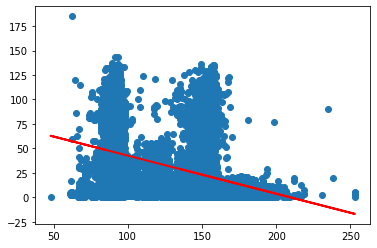

In [26]:
plt.scatter(X_1, y)
plt.plot(X_1, model.predict(X_1), color='red', linewidth=2)

## Предсказание ответа для тестового набора данных

In [55]:
y_pred_test = model.predict(test_full)

In [57]:
y_pred_test = pd.DataFrame(y_pred_test, columns=['critical_temp'])
y_pred_test = y_pred_test.reset_index()

y_pred_test.to_csv("solution.csv", index=False)